In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
import netCDF4
import cmocean
from mpl_toolkits.basemap import Basemap

In [4]:
bathfile1 = "/data/EMODnet/Bathymetry/G3_2018.dtm"
os.path.exists(bathfile)
domain1 = (-15.9, -15.3, 27.6, 28.3)

In [3]:
def extract_emodnet_bath(bathfile, domain):
    with netCDF4.Dataset(bathfile) as nc:
        lon = nc.get_variables_by_attributes(standard_name="projection_x_coordinate")[0][:]
        lat = nc.get_variables_by_attributes(standard_name="projection_y_coordinate")[0][:]
        goodlon = np.where((lon <= domain[1]) & (lon >= domain[0]))[0]
        goodlat = np.where((lat <= domain[3]) & (lat >= domain[2]))[0]
        lon = lon[goodlon]
        lat = lat[goodlat]
        depth = nc.variables["DEPTH"][goodlat, goodlon]
    return lon, lat, depth

In [5]:
lon, lat, depth = extract_emodnet_bath(bathfile1, domain1)

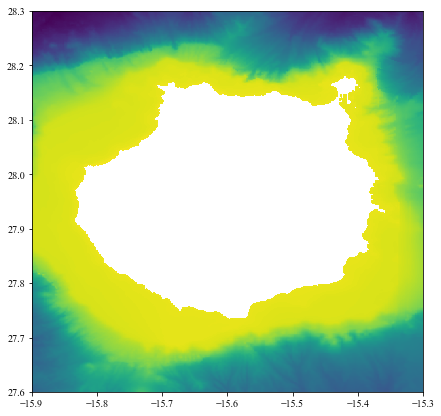

In [6]:
plt.figure(figsize=(7, 7))
plt.pcolormesh(lon, lat, depth)
plt.show()
plt.close()

## North Sea

In [8]:
bathfile2 = "/data/EMODnet/Bathymetry/E4_2018.dtm"
os.path.exists(bathfile2)
domain2 = (2., 4.25, 51., 52.)

In [9]:
lon2, lat2, depth2 = extract_emodnet_bath(bathfile2, domain2)

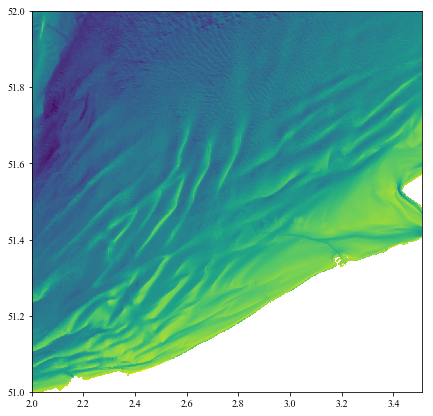

In [10]:
plt.figure(figsize=(7, 7))
plt.pcolormesh(lon2, lat2, depth2)
plt.show()
plt.close()

In [21]:
enlarge = 0.
m = Basemap(projection='merc',
            llcrnrlon=lon2.min() - enlarge, llcrnrlat=lat2.min() - enlarge,
            urcrnrlon=lon2.max() + enlarge, urcrnrlat=lat2.max() + enlarge,
            lat_ts=0.5 * (lat.min() + lat.max()), resolution="f")

/home/ctroupin/Software/PythonEnvs/Diva-python3.6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/ctroupin/Software/PythonEnvs/Diva-python3.6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/ctroupin/Software/PythonEnvs/Diva-python3.6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


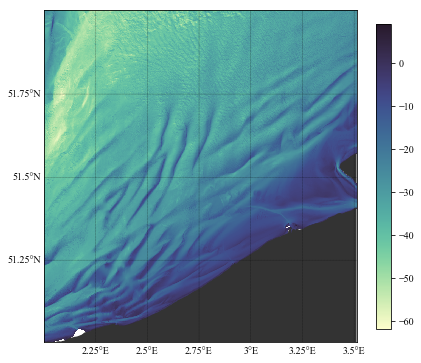

In [29]:
llon, llat = np.meshgrid(lon2, lat2)
plt.figure(figsize=(7, 7))
pcm = m.pcolormesh(llon, llat, depth2, latlon=True, cmap=cmocean.cm.deep)
cb = plt.colorbar(pcm, shrink=0.8)
m.fillcontinents(color=".2")
m.drawmeridians(np.arange(domain2[0], domain2[1], 0.25),
                labels=[0, 0, 0, 1], dashes=[2, 1], zorder=2, linewidth=.25)
m.drawparallels(np.arange(domain2[2], domain2[3], 0.25),
                labels=[1, 0, 0, 0], dashes=[2, 1], zorder=2, linewidth=.25)
plt.savefig("northsea_emodnet.jpg", dpi=300, bbox_inches="tight")
plt.show()
plt.close()